In [6]:
import pandas as pd
import numpy as np
# Libraries for Text Preprocessing
import re
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn import metrics


In [7]:

data_validation = pd.read_excel('./data_evaluation/validation_1_aspect(2).xlsx')
data_validation.tail(20)


,text,makanan,fasilitas,pelayanan,kamar,harga,lokasi
0,Hotel ini puna desain yg mewah dengan harga ya...,0,0,0,0,1,0
1,"pop hotel menawarkan harga yang terjangkau',",0,0,0,0,1,0
2,"harga menginap semalam dikamar vip murah',",0,0,0,0,1,0
3,Harga relatif murah dibandingkan hotel bintan...,0,0,0,0,1,0
4,Harga hotel yg murah sekitar 500 rb untuk bint...,0,0,0,0,1,0
5,"harga deluxe kamar terlalu mahal',",0,0,0,0,1,0
6,hotel ini menawarkan harga yang sangat terjang...,0,0,0,0,1,0
7,Pop Hotel keren bagus bersih dan murah meriah,0,0,0,0,1,0
8,menurutku sesuai harga sih👍🏻 rekomendasi hotel...,0,0,0,0,1,0
9,harga pas untuk kaum backpacker,0,0,0,0,1,0


In [8]:
import neattext.functions as nfx

def cleaning(text):
    text = nfx.remove_numbers(text) # Hapus number
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) # Hapus karakter selain alfabet dan angka
    return text

def casefolding(text):
    return text.lower()

data_validation['content_cleaned'] = data_validation['text'].apply(cleaning).apply(casefolding)

data_validation.head(18)

,text,makanan,fasilitas,pelayanan,kamar,harga,lokasi,content_cleaned
0,Hotel ini puna desain yg mewah dengan harga ya...,0,0,0,0,1,0,hotel ini puna desain yg mewah dengan harga ya...
1,"pop hotel menawarkan harga yang terjangkau',",0,0,0,0,1,0,pop hotel menawarkan harga yang terjangkau
2,"harga menginap semalam dikamar vip murah',",0,0,0,0,1,0,harga menginap semalam dikamar vip murah
3,Harga relatif murah dibandingkan hotel bintan...,0,0,0,0,1,0,harga relatif murah dibandingkan hotel bintan...
4,Harga hotel yg murah sekitar 500 rb untuk bint...,0,0,0,0,1,0,harga hotel yg murah sekitar rb untuk bintang ...
5,"harga deluxe kamar terlalu mahal',",0,0,0,0,1,0,harga deluxe kamar terlalu mahal
6,hotel ini menawarkan harga yang sangat terjang...,0,0,0,0,1,0,hotel ini menawarkan harga yang sangat terjang...
7,Pop Hotel keren bagus bersih dan murah meriah,0,0,0,0,1,0,pop hotel keren bagus bersih dan murah meriah
8,menurutku sesuai harga sih👍🏻 rekomendasi hotel...,0,0,0,0,1,0,menurutku sesuai harga sih rekomendasi hotel k...
9,harga pas untuk kaum backpacker,0,0,0,0,1,0,harga pas untuk kaum backpacker


In [9]:
from keras.models import load_model
tokenizer = Tokenizer()

tokenizer.fit_on_texts(data_validation['text'])
X=tokenizer.texts_to_sequences(data_validation['text'])
X=pad_sequences(X, maxlen=31, padding='post')

threshold = 0.5
prediction_result = []
model = load_model('aspek_harga.h5')

predictions_label = model.predict(X)
predictions_label = tf.where(predictions_label < threshold, 0, 1)

for result in predictions_label:
    prediction_result.append(result[0].numpy())


print(prediction_result)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]


       False  True
False      0     3
True       3     9


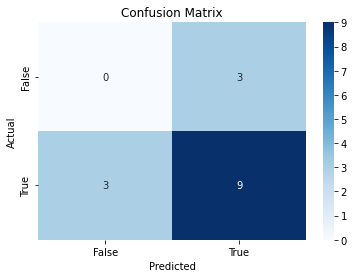

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

actual_aspect = data_validation['harga'].tolist()

# Membuat confusion matrix
confusion_mat = confusion_matrix(prediction_result, actual_aspect)

confusion_df = pd.DataFrame(confusion_mat, index=['False', 'True'], columns=['False', 'True'])
print(confusion_df)

# Visualisasi confusion matrix
sns.heatmap(confusion_df, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
y_pred = np.array(prediction_result)
y_true = np.array(actual_aspect)

recall = metrics.recall_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred)
accuracy = metrics.accuracy_score(y_true, y_pred)
F1_score = metrics.f1_score(y_true, y_pred)
print("recall" ,recall)
print("precision" ,precision)
print("accuracy" ,accuracy)
print("F1_score" ,F1_score)


recall 0.75
precision 0.75
accuracy 0.6
F1_score 0.75
